In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

####  Step-1. loading data

In [ ]:

student_data = pd.read_csv('Data/jamboree_admission.csv')
student_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Step-2. Exploring the Data

In [5]:
# info
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# null
student_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##### Step- 2.1 - Visualize the Data

In [9]:
student_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

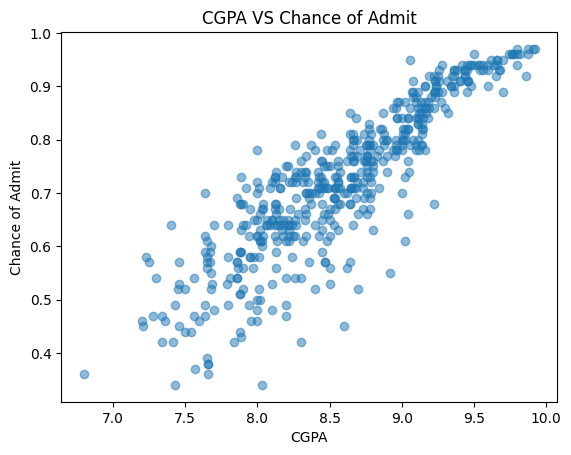

In [14]:
# visualize CGPA vs Chance of Admit to analyze the relationship.
plt.scatter(student_data['CGPA'], student_data['Chance of Admit '], alpha=0.5)
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.title("CGPA VS Chance of Admit")
plt.show()

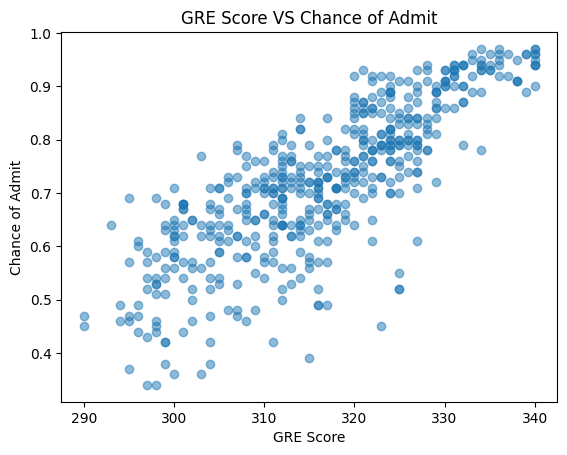

In [15]:
# visualize 'GRE Score vs Chance of Admit to analyze the relationship.
plt.scatter(student_data['GRE Score'], student_data['Chance of Admit '], alpha=0.5)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.title("GRE Score VS Chance of Admit")
plt.show()

#### Step 3: Feature Selection & Preprocessing

Before training our model, we need to: 
- ✅ Select relevant features
- ✅ Scale data for better model performance
- ✅ Split data into training and testing sets


##### Step 3.1. Selecting Features
We’ll use the following predictors:
- GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
- Target variable: Chance of Admit


In [17]:
student_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# selecting features
X = student_data[[ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]


In [24]:
# Target feature
y = student_data[ 'Chance of Admit ']

In [25]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [26]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

Step -3.2  Splitting Data for Training & Testing
- We need to divide data so the model learns from one set and predicts on unseen data:


In [27]:
from sklearn.model_selection import train_test_split

# Splitting into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print("Original Data", X.shape)
print("Training Data:", X_train.shape)
print("Target Training Original Shape:", y.shape)
print("Target Testing Shape:", y_train.shape)

Original Data (500, 7)
Training Data: (400, 7)
Target Training Original Shape: (500,)
Target Testing Shape: (400,)


#### Step 4: Training a Random Forest Regressor
- We'll now train the model using Random Forest, which we've already discussed as the best choice.

##### Step 4.1. Import & Initialize Random Forest


In [32]:
from sklearn.ensemble import RandomForestRegressor
#initialize the model

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

##### step-4.2 Model Training

In [33]:
# train the model on training data
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#### Step 5: Making Predictions with Random Forest
- Now that our model is trained, let’s use it to predict student admission chances.
##### 5.1. Predict on Test Data


In [35]:
# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

In [36]:
# Display some predictions
print("Predicted Admission Chances:", np.round(y_pred[:10], 2))
print("Actual Admission Chances:", np.round(y_test[:10].values, 2))


Predicted Admission Chances: [0.94 0.79 0.61 0.7  0.79 0.88 0.47 0.63 0.84 0.79]
Actual Admission Chances: [0.93 0.84 0.39 0.77 0.74 0.89 0.47 0.57 0.68 0.82]


##### Step 5.2. Evaluate Model Performance
- Let’s measure how accurate our predictions are using Mean Absolute Error (MAE):

In [37]:
from sklearn.metrics import mean_absolute_error

# calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", round(mae, 4))


Mean Absolute Error: 0.0438


#### Takeaway:  How Close Are Predictions?
- Lower MAE → Better Model Accuracy
- Since admission chances are between 0 and 1, an error of 0.0438 (~4%) is quite low, meaning our model is performing well.


Visual Presentation

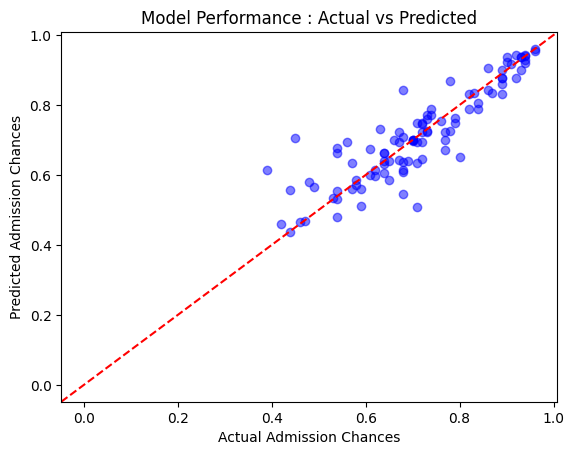

In [38]:
# Scatter plot of actual vs predicted admission chances
plt.scatter(y_test, y_pred, alpha=0.5, color = 'blue')
plt.xlabel("Actual Admission Chances")
plt.ylabel("Predicted Admission Chances")
plt.title("Model Performance : Actual vs Predicted")
plt.axline((0,0), slope=1, color = 'red', linestyle = "--" )
plt.show()

In [40]:
import pickle

# Save the model
with open("artifacts/random_forest_model.pkl", "wb") as file:
    pickle.dump(random_forest_model, file)